# **Welcome to HR Analytics Handson**

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the required dataset
df_hr = pd.read_csv(r'D:\Intellipaat\Datasets\HR_data.csv')
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Rename Column (having Uppercase or Complicated names)
df_hr.rename(columns={'Department' : 'department'}, inplace=True)
df_hr.rename(columns={'Work_accident' : 'work_accident'}, inplace=True)
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Exploratory Data Analysis

In [4]:
# information about data
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Inference :-  Here, we see all columns and there data types are correct and there's no need to change anything.

In [5]:
# Check for null values
df_hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Inference :- Here, we see there's no null values, so nothing to do here.

In [6]:
# Check for duplicate values
df_hr.duplicated().sum()

3008

In [7]:
# Remove the duplicates from Dataframe
df_hr.drop_duplicates(inplace=True)
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


After removing duplicates, we remains with nearly 12000 records which are enough for our analysis.

In [8]:
# Description of Data in DF
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Visualization

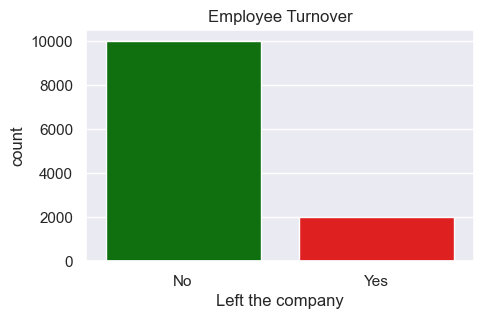

In [9]:
# Create a barplot to visualize employee turnover.
sns.set_theme(rc={'figure.figsize' : (5, 3)})
sns.countplot(x='left', data=df_hr, palette=['green', 'red'])
plt.title('Employee Turnover')
plt.xlabel('Left the company')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Inference :- Turnover ratio is average, we need to improve it.

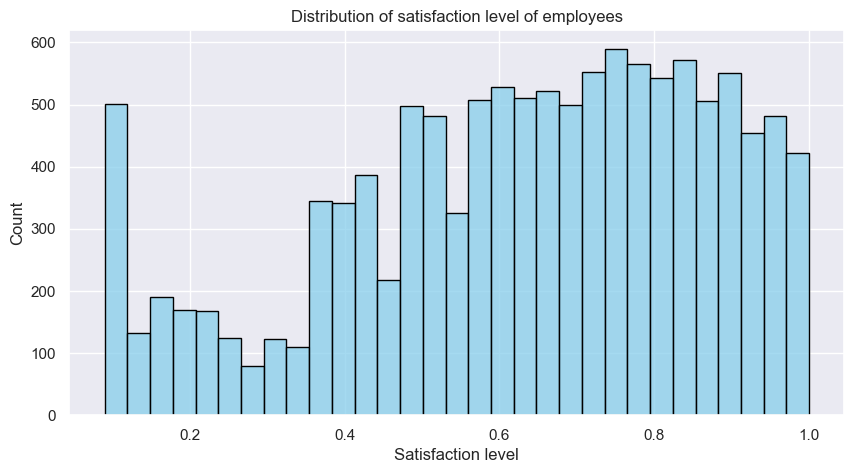

In [10]:
# Create a histogram to visualize distribution of satisfaction levels.
sns.set_theme(rc={'figure.figsize' : (10, 5)})
sns.histplot(x='satisfaction_level', data=df_hr, color='skyblue', edgecolor='black')
plt.title('Distribution of satisfaction level of employees')
plt.xlabel('Satisfaction level')
plt.show()

In [11]:
# Biased columns :- 

    # 1. satisfaction_level :- Biased if an employee is leaving, he can give bad ratings.
    # 2. last_evaluation :- The manager can rate an employee wrong (for personal issue).
    # 3. average_monthly_hours :- It is semi-biased.

In [12]:
# Important columns :-

    # number_project, time_spend_company, work_accident, left, promotion_last_5years, department, salary


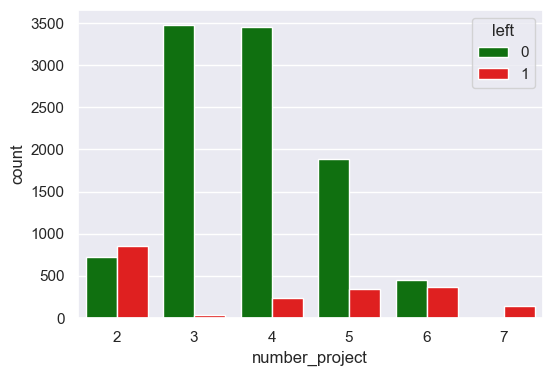

In [13]:
# Create a bar plot to visualize the number of projects for both the left & didn't lefted employees.
sns.set_theme(rc={'figure.figsize' : (6, 4)})
sns.countplot(x='number_project', data=df_hr, hue='left', palette=['green', 'red'])
plt.show()

Inference :- Less & very much number of project is bit concern for employees to left.

Suggestion :- Number of projects should be in limit i.e. between 3 to 5

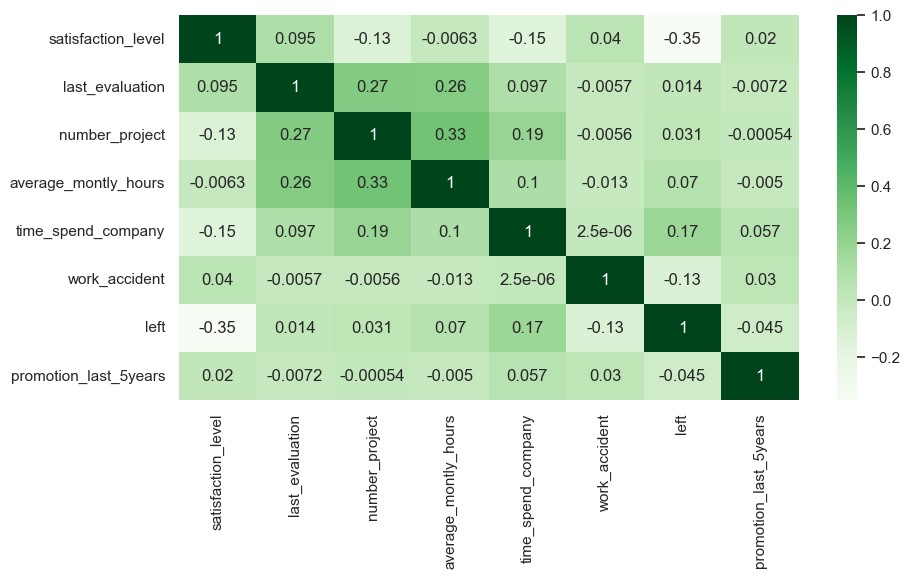

In [14]:
# Create a heatmap to visualize the correlation between each columns in DataFrame.
sns.set_theme(rc={'figure.figsize' : (10, 5)})
sns.heatmap(df_hr.corr(numeric_only=True), annot=True, cmap='Greens')
plt.show()

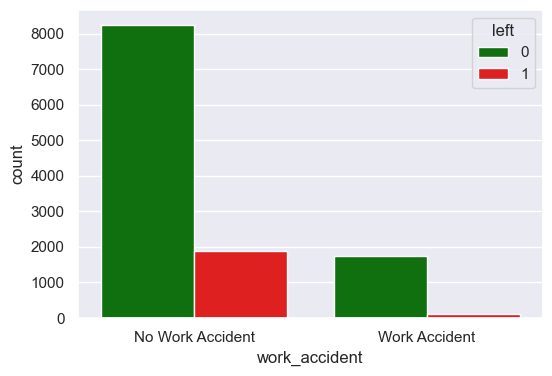

In [15]:
# Create a bar plot to visualize the role of work accident for both the left & didn't lefted employees.
sns.set_theme(rc={'figure.figsize' : (6, 4)})
sns.countplot(x='work_accident', data=df_hr, hue='left', palette=['green', 'red'])
plt.xticks([0, 1], ['No Work Accident', 'Work Accident'])
plt.show()

Inference :- The work accident is not playing the major role for left the company, cause maximum number of 
             employees left they're having no work accident.

Suggestion :- None.

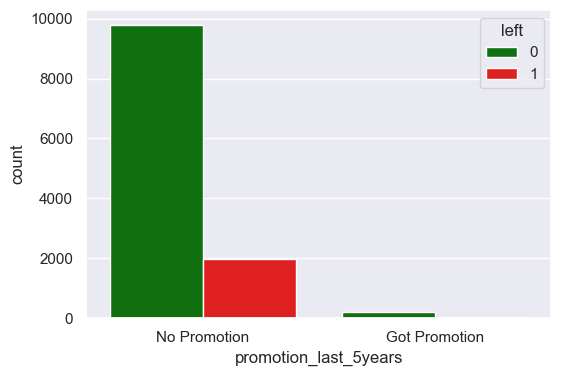

In [16]:
# Create a bar plot to visualize promotion in last 5 years for both the left & didn't lefted employees.
sns.set_theme(rc={'figure.figsize' : (6, 4)})
sns.countplot(x='promotion_last_5years', data=df_hr, hue='left', palette=['green', 'red'])
plt.xticks([0, 1], ['No Promotion', 'Got Promotion'])
plt.show()

Inference :- Employees who are not getting promotion they are leaving.

Suggestion :- 
- Time to time promotion or reduce the period of giving the promotion.
- Train them to upgrade their skils and then give promotion based on there capabilities.

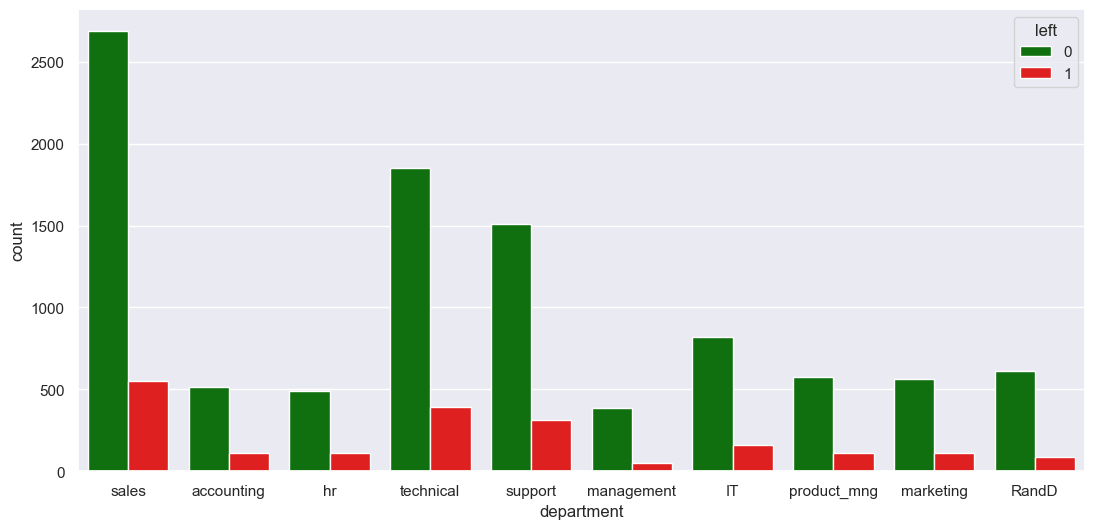

In [17]:
# Create a bar plot to visualize that from which deparment the employees are leaving.
sns.set_theme(rc={'figure.figsize' : (13, 6)})
sns.countplot(x='department', data=df_hr, hue='left', palette=['green', 'red'])
plt.show()

Inference :- Employees from sales, technical & support department are leaving the company most.

Suggestion :- 
- Provide option to shift on other department (if capable).
- Give or increase the incentives.
- Organize team meetings to discuss the problems employees are facing.
- Take for team outing, lunch or any fun activites for mind fresh.
- Have survey time to time.

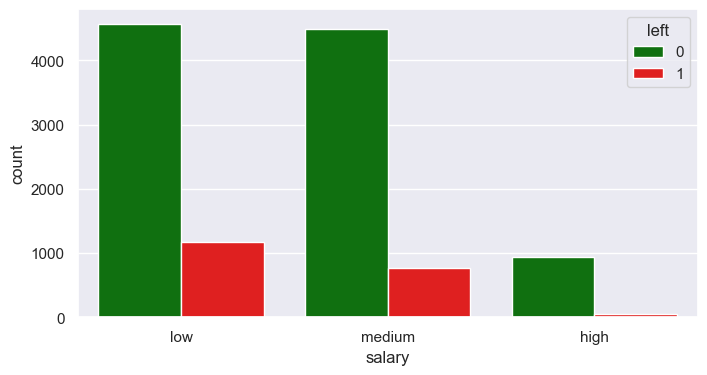

In [18]:
# Create a bar plot to visualize the eployees leaving based on salary perspective.
sns.set_theme(rc={'figure.figsize' : (8, 4)})
sns.countplot(x='salary', data=df_hr, hue='left', palette=['green', 'red'])
plt.show()

Inference :- Employees with low/medium salary leaving the most.

Suggestion :- regular salary hikes + promotion + incentives + project changes

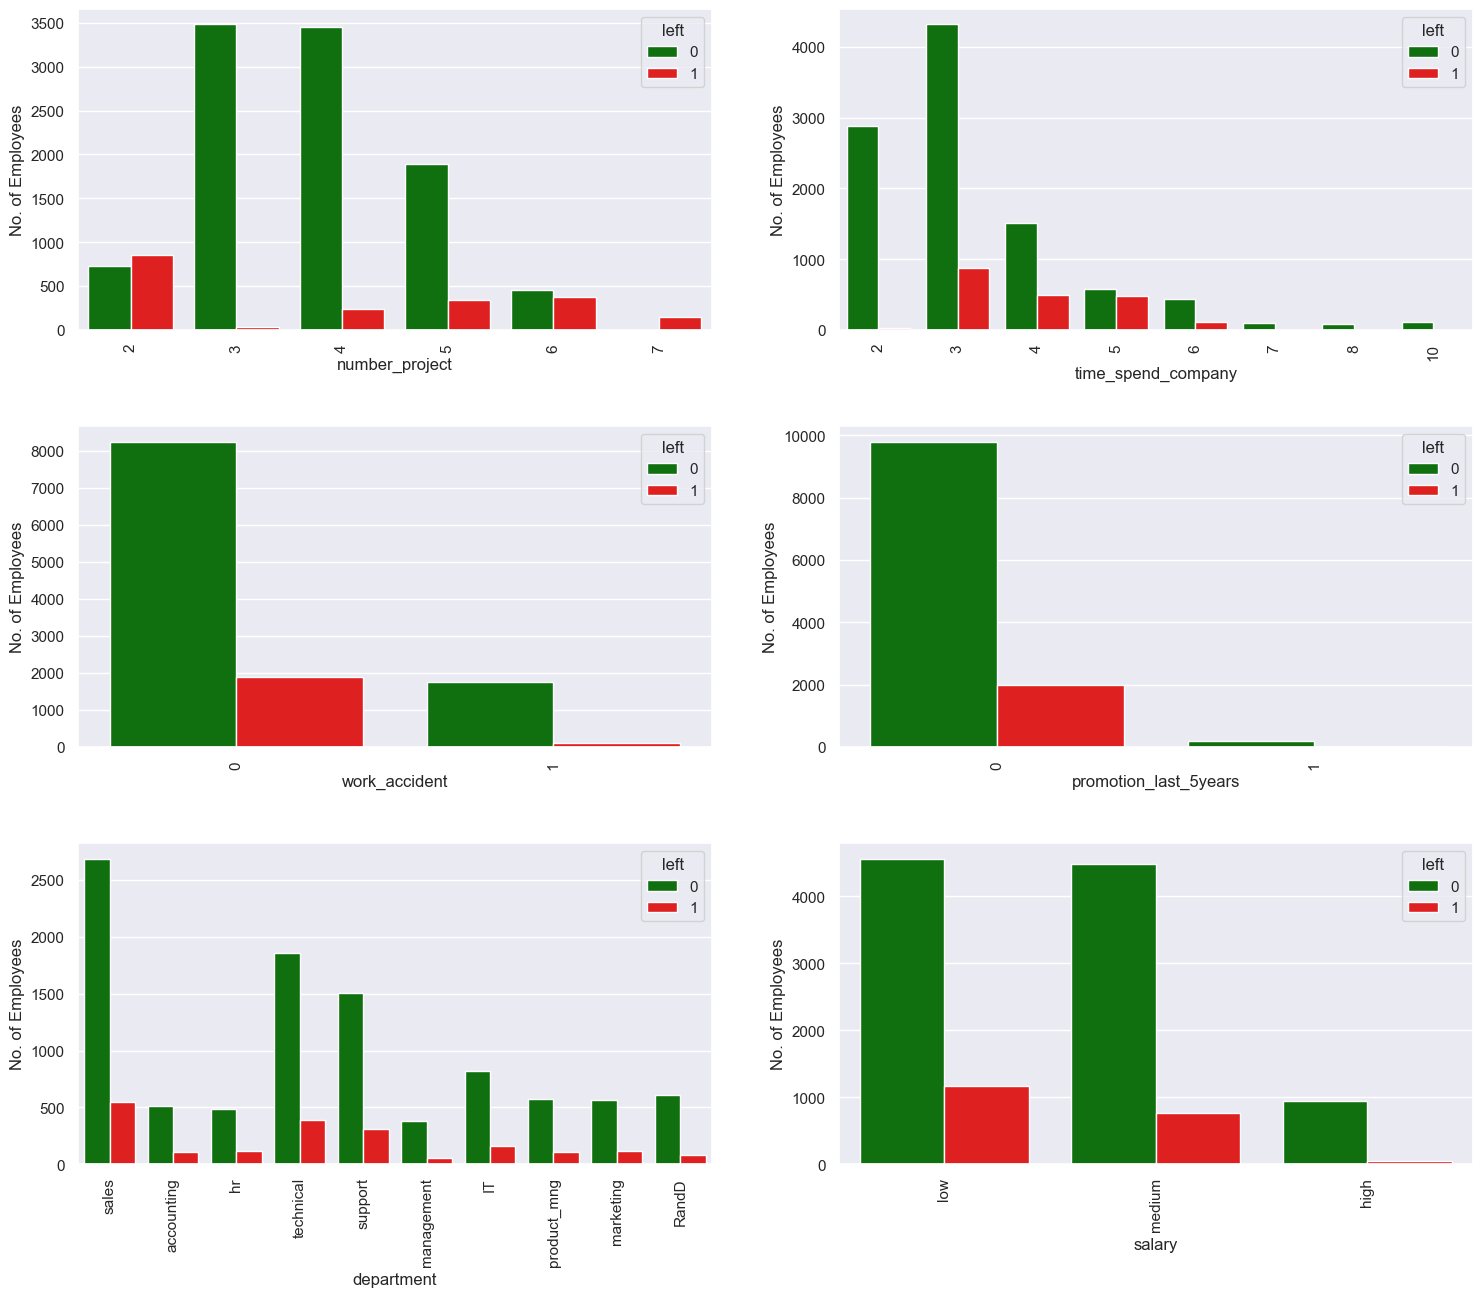

In [19]:
# Create variable consisting all the important columns for subplot
col = ['number_project', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'department', 'salary']

# Create subplots having No. of employees with respect to all the important column for both left & not left employees.
sns.set_theme(rc={'figure.figsize' : (18, 15)})

for plot, x_axis in enumerate(col):                     # 'Enumerates' gives index for value (starts from 0)
    plt.subplot(3, 2, plot+1)
    plt.subplots_adjust(hspace=0.3)
    sns.countplot(x=x_axis, data=df_hr, hue='left', palette=['green', 'red'])
    plt.ylabel('No. of Employees')
    plt.xticks(rotation=90)

END

---